In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df_weather = pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv", sep = ",")

In [ ]:
display(df_weather.head())

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,...,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,...,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,...,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,...,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,...,3,116,116,116,0,1,8.7,very bad,1,5


In [ ]:
df_weather.shape

(366, 24)

In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

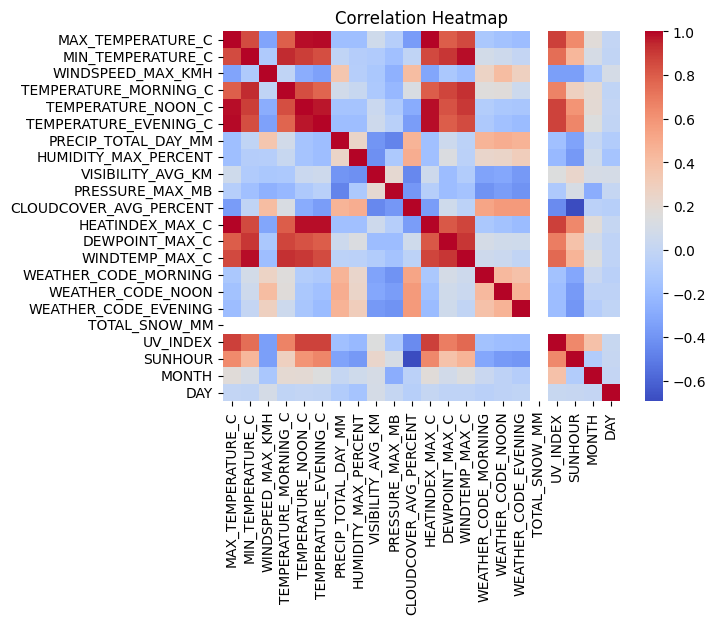

In [ ]:
sans_col = ["DATE", "OPINION"]
data = df_weather.loc[:, ~df_weather.columns.isin(sans_col)]
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.show()


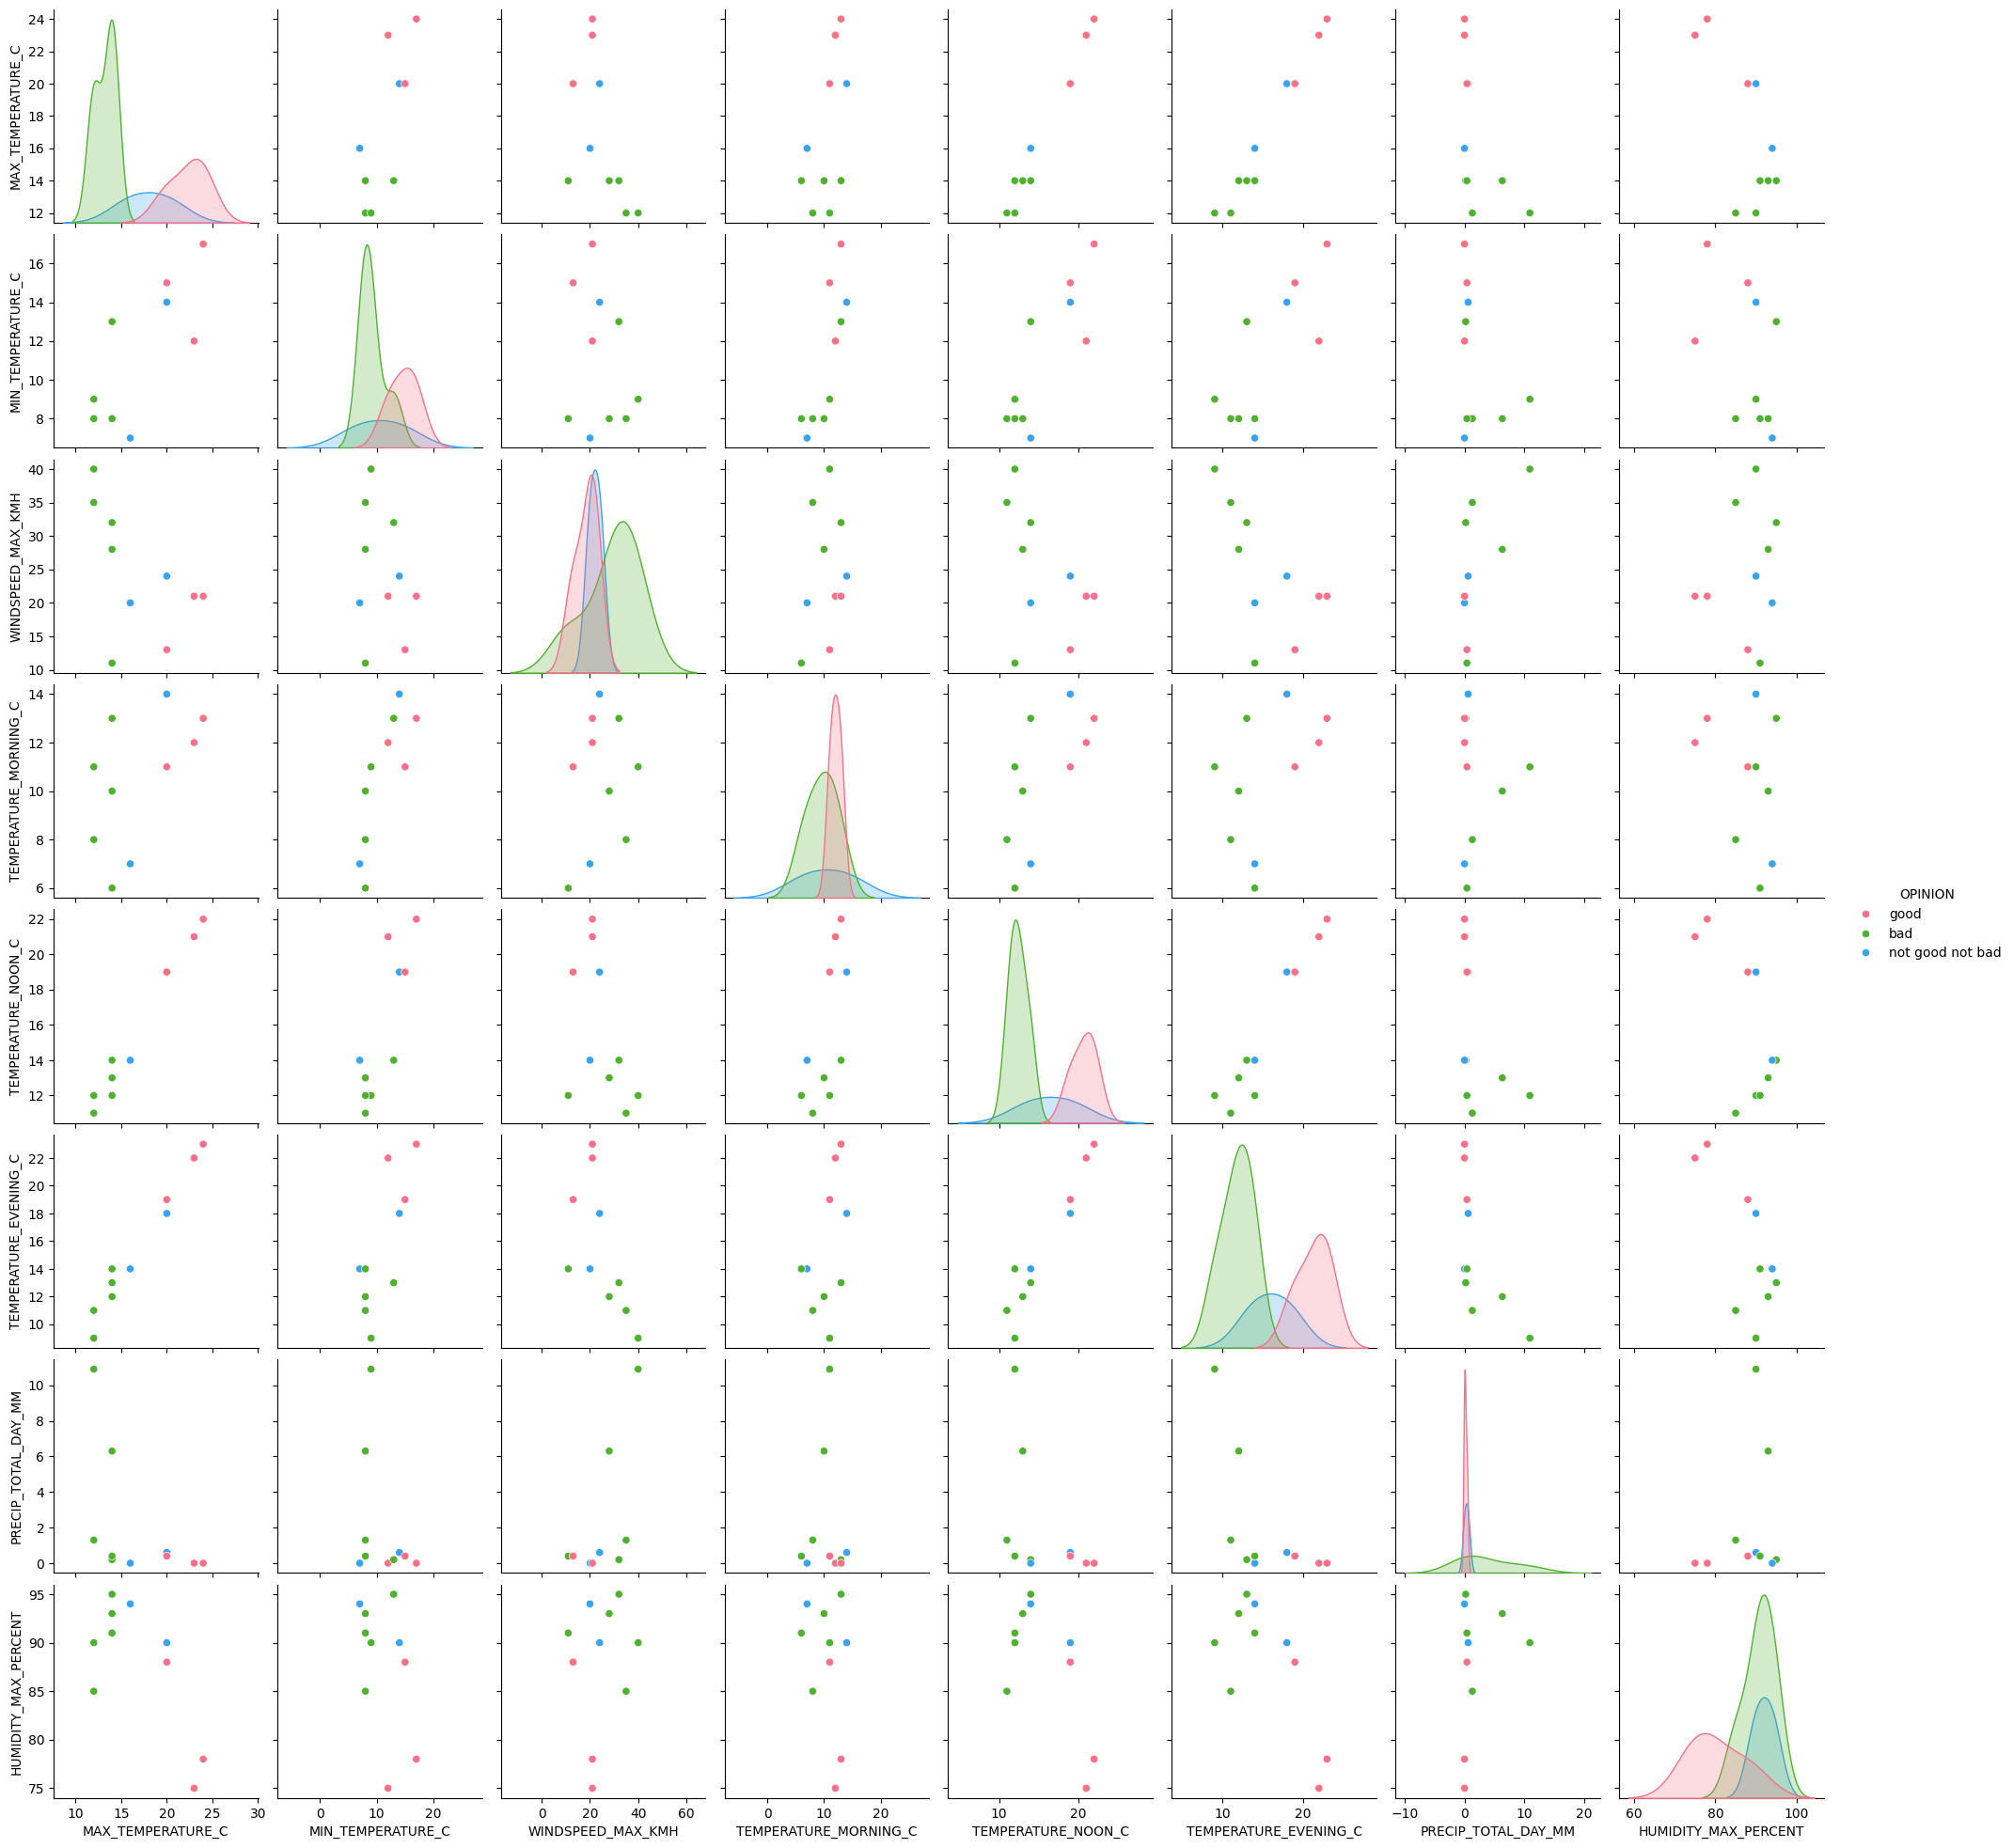

In [ ]:
data = ['OPINION'] + list(df_weather.drop('OPINION', axis=1).columns[:9])

sampled_data = df_weather[data].sample(n=10, random_state=42)

sns.pairplot(sampled_data, hue="OPINION", palette="husl")
plt.show()

In [ ]:
X = df_weather.select_dtypes(include = 'number')

In [ ]:
X.shape

(366, 22)

In [ ]:
y = df_weather["OPINION"]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

X_scaled.shape

(366, 22)

In [ ]:
from sklearn.decomposition import PCA

# avec 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(366, 2)

In [ ]:
# ici on ne précise pas le nombre de dimensions
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

X_pca.shape

(366, 22)

In [ ]:
pca.explained_variance_ratio_

array([4.09974128e-01, 2.08764137e-01, 6.44852689e-02, 5.96277270e-02,
       4.57715483e-02, 3.90945593e-02, 2.96727035e-02, 2.79956895e-02,
       2.50111074e-02, 2.23798923e-02, 2.06096373e-02, 1.72091698e-02,
       1.06921087e-02, 5.50690832e-03, 5.23972301e-03, 3.80814302e-03,
       2.24566722e-03, 7.91559882e-04, 5.45015534e-04, 4.08638014e-04,
       1.66668050e-04, 1.81975769e-38])

In [ ]:
# ici je ne comprends pas ce résultat

In [ ]:
# ici on veut expliquer 70% de la variance
pca = PCA(n_components = 0.7)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(366, 4)

In [ ]:
# pour expliquer 70% de la variance il y a besoin de 4 dimensions

In [ ]:
# on teste pour 80%
pca = PCA(n_components = 0.8)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_pca.shape

(366, 6)

In [ ]:
# pour expliquer 80% de la variance on a besoin de 6 dimensions

##KNN Classifier

Sur X_scaled

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, train_size = 0.75)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5)

modelKNN.fit(X_train, y_train)

print("\nScore for the Train dataset :", modelKNN.score(X_train, y_train))
print("Score for the Test dataset :", modelKNN.score(X_test, y_test))

print("Scikit-Learn : ", modelKNN.predict([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]]))


Score for the Train dataset : 0.8467153284671532
Score for the Test dataset : 0.7934782608695652
Scikit-Learn :  ['good']


Sur X_pca

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42, train_size = 0.75)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5)

modelKNN.fit(X_train, y_train)

print("\nScore for the Train dataset :", modelKNN.score(X_train, y_train))
print("Score for the Test dataset :", modelKNN.score(X_test, y_test))

print("Scikit-Learn : ", modelKNN.predict([[10, 10, 10, 10, 10, 10]]))


Score for the Train dataset : 0.8248175182481752
Score for the Test dataset : 0.7608695652173914
Scikit-Learn :  ['good']


In [ ]:
display(X_pca)

array([[-2.97987147,  2.61453732,  2.8859532 , -1.09325648,  0.44689298,
         0.42202727],
       [-2.6958366 , -0.06353191,  2.26426249, -1.26933872,  0.06147216,
         1.70421241],
       [-2.31402513,  0.03346593,  2.00696481, -1.44871   ,  0.07386962,
         1.75254075],
       ...,
       [-4.15427537,  0.09552199, -1.31593286,  2.64007758, -0.74172798,
        -2.21211158],
       [-4.43849341, -1.48453855, -0.8812206 ,  2.37776356, -1.42855298,
        -0.8373469 ],
       [-4.68480637,  1.48249327, -1.43168694,  2.29644065, -1.13337073,
        -0.95042739]])

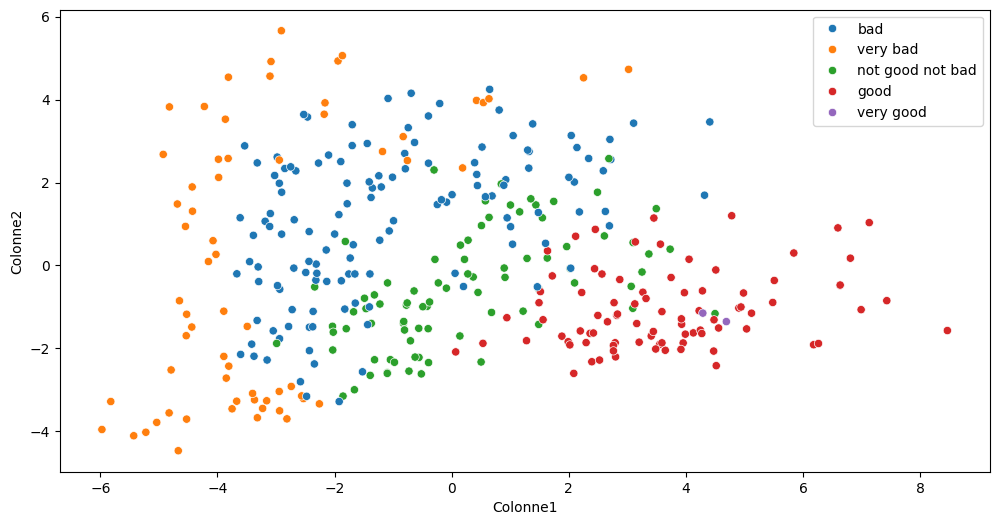

In [44]:
pca_reduit = X_pca[:, :2]
data_pca = pd.DataFrame(pca_reduit, columns=['Colonne1', 'Colonne2'])
df_opinions = df_weather["OPINION"]

data_final = pd.concat([data_pca, df_opinions], axis = 1)

fig = plt.subplots(figsize = (12, 6))

sns.scatterplot(x="Colonne1", y="Colonne2", hue = "OPINION", data=data_final)

plt.legend()